A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service


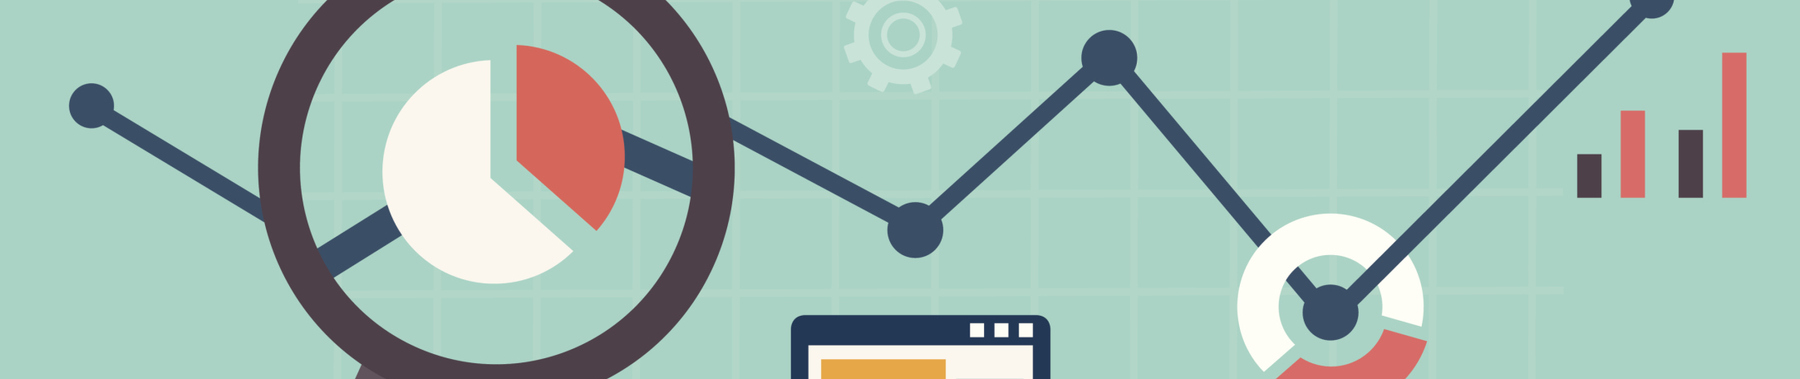



The main objective is to train a predictive model which allows the company to maximize the profit of the next marketing campaign.


##***Attributes Information***


**AcceptedCmp1** - 1 if customer accepted the offer in the 1st campaign, 0 otherwise

**AcceptedCmp2** - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

**AcceptedCmp3** - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

**AcceptedCmp4** - 1 if customer accepted the offer in the 4th campaign, 0 otherwise

**AcceptedCmp5** - 1 if customer accepted the offer in the 5th campaign, 0 otherwise

**Response (target)** - 1 if customer accepted the offer in the last campaign, 0 otherwise

**Complain** - 1 if customer complained in the last 2 years

**DtCustomer** - date of customer’s enrolment with the company

**Education** - customer’s level of education

**Marital** - customer’s marital status

**Kidhome** - number of small children in customer’s household

**Teenhome** - number of teenagers in customer’s household

**Income** - customer’s yearly household income

**MntFishProducts** - amount spent on fish products in the last 2 years

**MntMeatProducts** - amount spent on meat products in the last 2 years

**MntFruits** - amount spent on fruits products in the last 2 years

**MntSweetProducts** - amount spent on sweet products in the last 2 years

**MntWines** - amount spent on wine products in the last 2 years

**MntGoldProds** - amount spent on gold products in the last 2 years

**NumDealsPurchases** - number of purchases made with discount

**NumCatalogPurchases** - number of purchases made using catalogue

**NumStorePurchases** - number of purchases made directly in stores

**NumWebPurchases** - number of purchases made through company’s web site

**NumWebVisitsMonth** - number of visits to company’s web site in the last month

**Recency** - number of days since the last purchase

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df=pd.read_excel('../input/arketing-campaign/marketing_campaign.xlsx')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


**Check Data**

In [3]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe()


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


**Fill some Missing Values**

In [6]:
df['Income'].fillna(df['Income'].mean(),inplace=True)

In [7]:
df.Dt_Customer = pd.to_datetime(df.Dt_Customer,dayfirst = False)

In [8]:
df[['month']] = pd.DataFrame(df.Dt_Customer.dt.month)
df[['day']] = pd.DataFrame(df.Dt_Customer.dt.day)
df[['year']] = pd.DataFrame(df.Dt_Customer.dt.year)
df.drop(columns = 'Dt_Customer',inplace = True)

***Some EDA For data***

<AxesSubplot:xlabel='Education'>

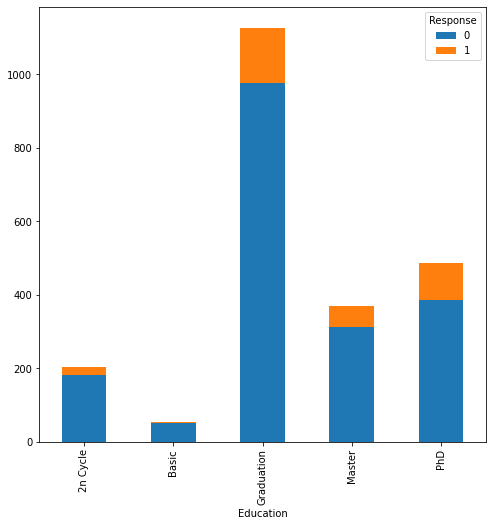

In [9]:
pd.crosstab(index= df['Education'] , columns=df['Response']).plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

<AxesSubplot:xlabel='Marital_Status'>

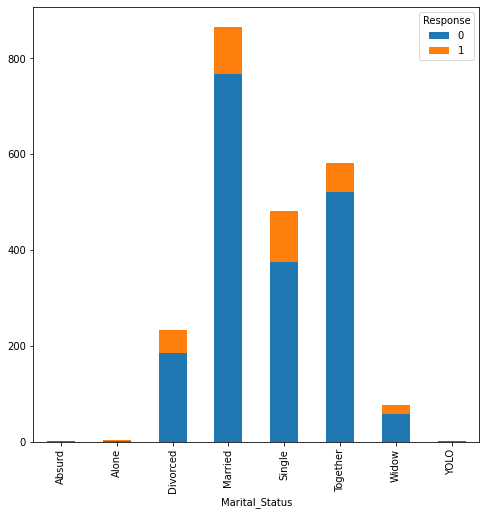

In [10]:
pd.crosstab(index= df['Marital_Status'] , columns=df['Response']).plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

**which purches way is the customers' favorite**

<AxesSubplot:ylabel='0'>

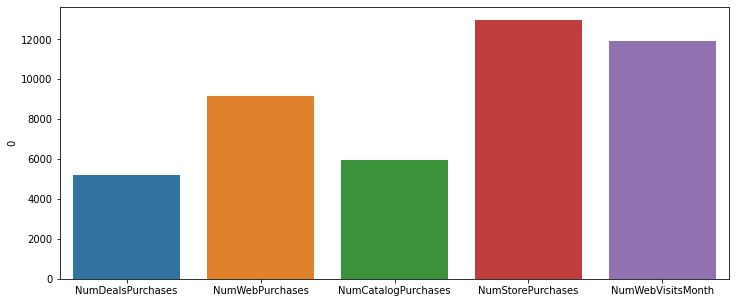

In [11]:
spent_tot = pd.DataFrame(df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].sum())
plt.figure(figsize=(12,5))
sns.barplot(x = spent_tot.index,y = spent_tot[0], data = spent_tot)

**What type of groceries are most popular**

<AxesSubplot:ylabel='0'>

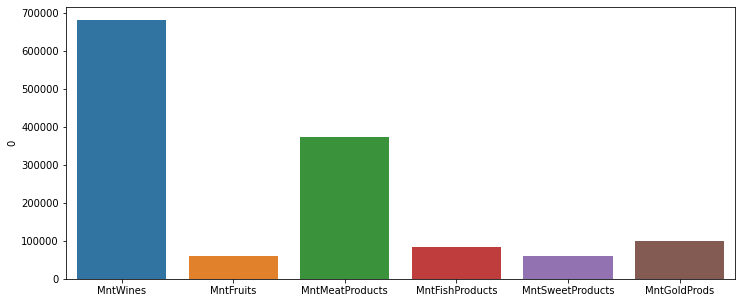

In [12]:
spent_tot = pd.DataFrame(df[[ 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum())
plt.figure(figsize=(12,5))
sns.barplot(x = spent_tot.index,y = spent_tot[0], data = spent_tot)

**what is most accepted last campaigns**

<AxesSubplot:ylabel='0'>

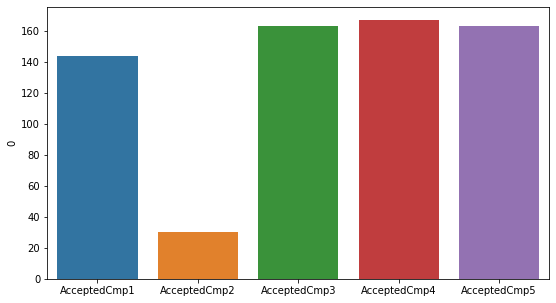

In [13]:
Cmp_tot = pd.DataFrame(df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5']].sum())
plt.figure(figsize=(9,5))
sns.barplot(x = Cmp_tot.index,y = Cmp_tot[0])

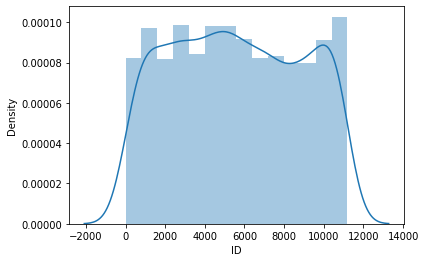

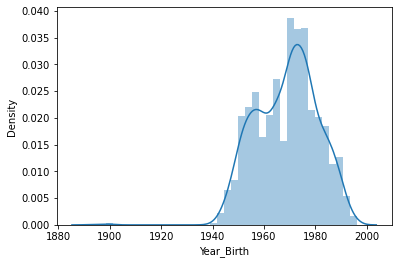

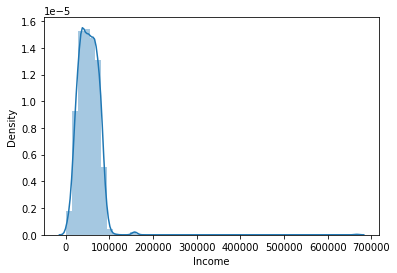

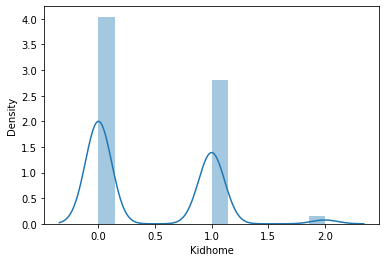

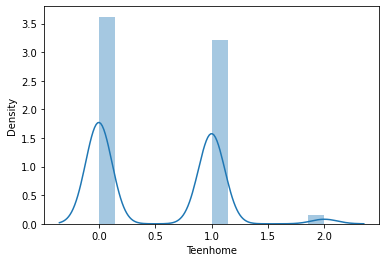

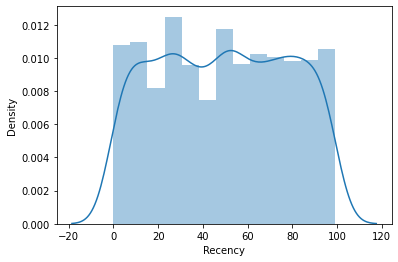

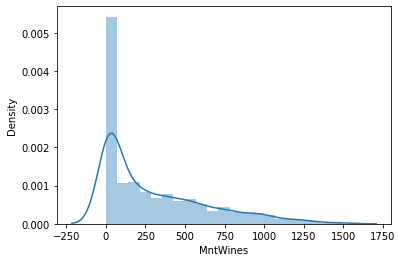

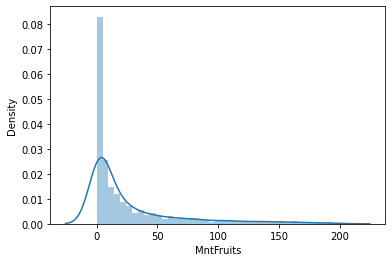

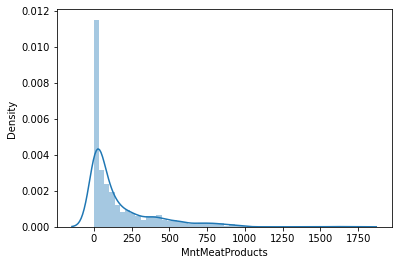

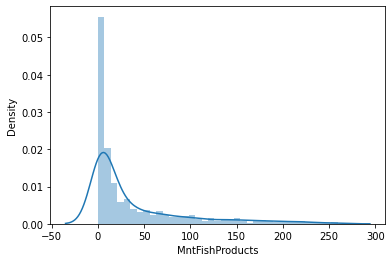

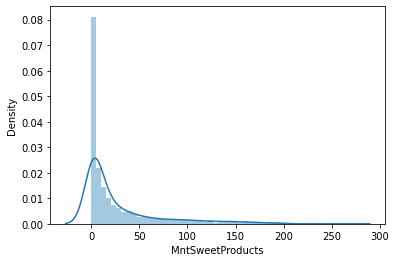

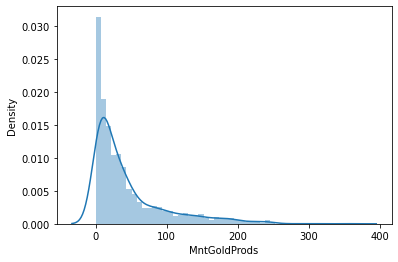

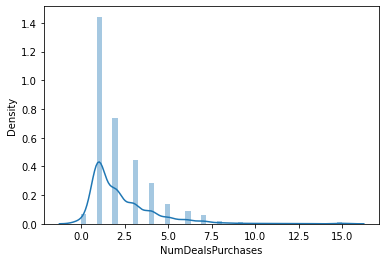

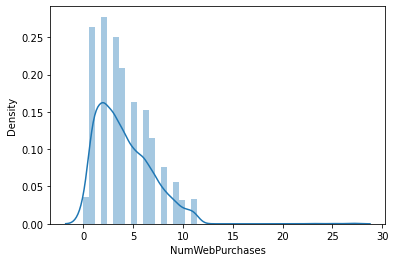

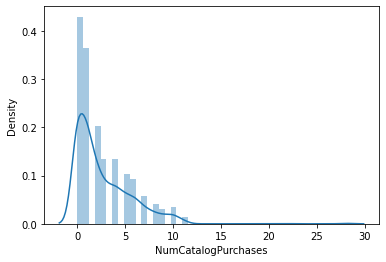

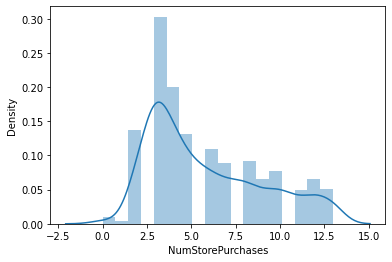

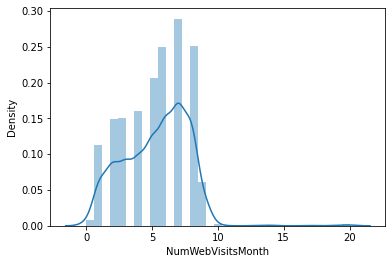

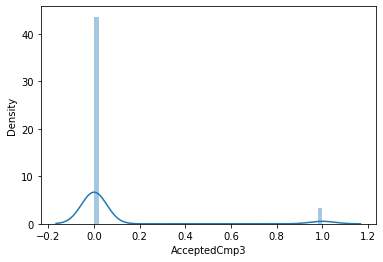

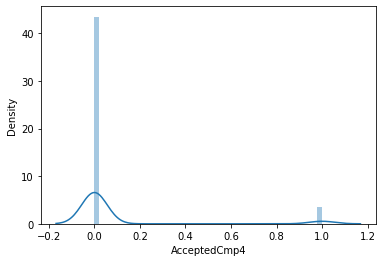

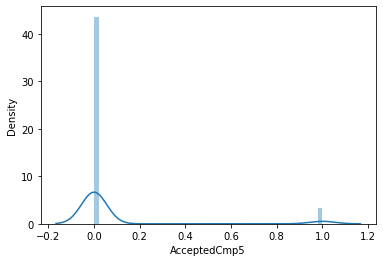

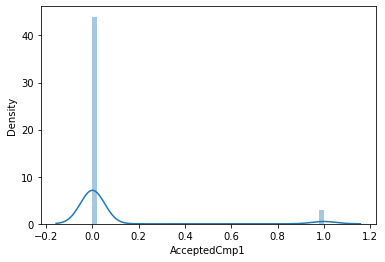

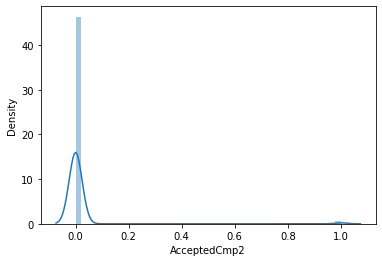

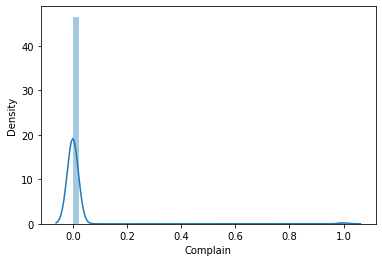

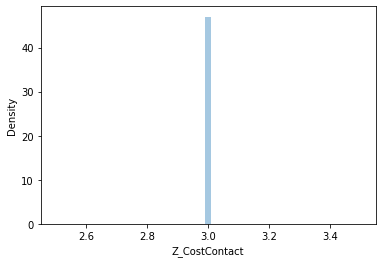

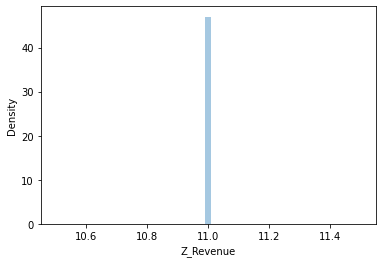

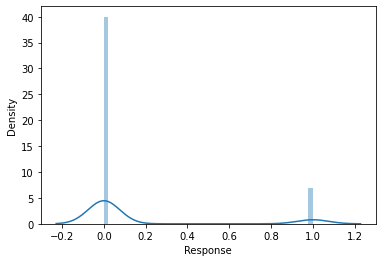

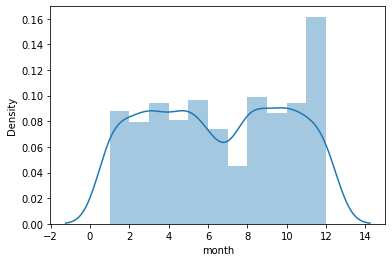

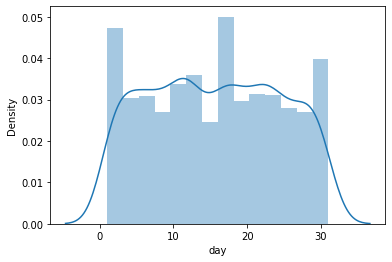

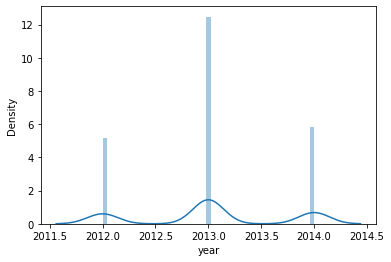

In [14]:
numerical = [features for features in df.columns if df[features].dtypes != 'O'] 
for f in numerical:
    sns.distplot(df[f])
    plt.show()

***Adding Features***

In [15]:
df['N_Years_customer_enrolment']=2022-df['year']

In [16]:
df['N_Month_customer_enrolment']=df['month']

<AxesSubplot:xlabel='Response', ylabel='count'>

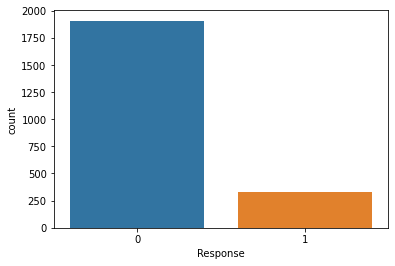

In [17]:
sns.countplot(df['Response'])

***Data is imbalanced***

In [18]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
for feature in ['Education','Marital_Status']:
  df[feature]=encode.fit_transform(df[feature])

***Drop unimportant column***

In [19]:
df.drop('ID',axis=1,inplace=True)

In [20]:
df.drop('day',axis =1,inplace=True)

In [21]:
df.drop('year',axis =1,inplace=True)

In [22]:
df.drop('month',axis =1,inplace=True)

In [23]:
X = df.drop('Response', axis=1).values
y = df['Response'].values

***Solve Imbalance data with SMOTE***

In [24]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
R = RandomOverSampler()
o_x,o_y = R.fit_resample(X,y)

<AxesSubplot:ylabel='count'>

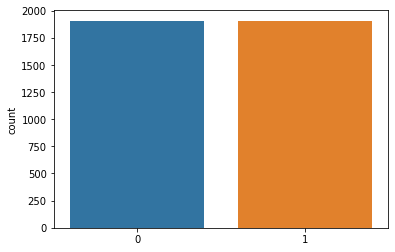

In [25]:
sns.countplot(o_y)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(o_x,o_y,test_size=0.25,random_state=101)

In [27]:
X_train.shape

(2859, 28)

In [28]:
X_test.shape

(953, 28)

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

***Tring ANN With More Architecture***
--
--



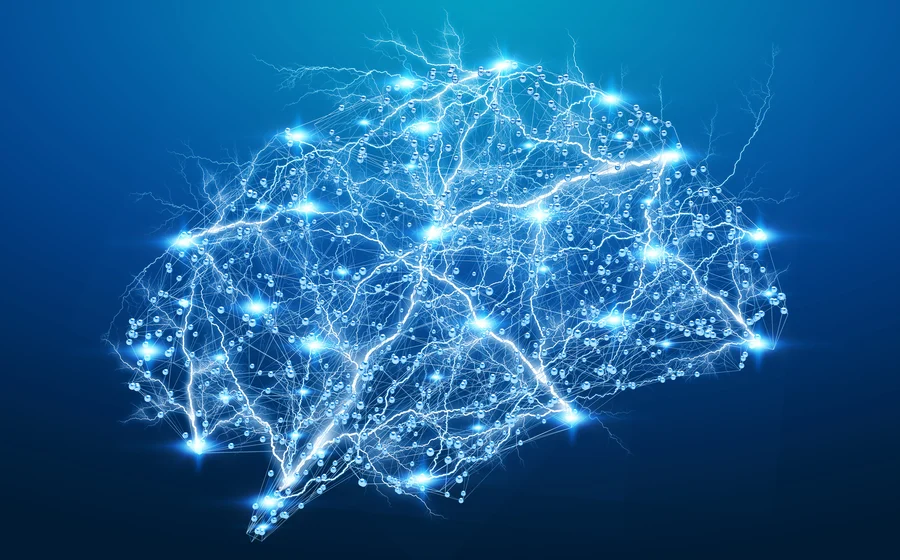

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
model = Sequential()

model.add(Dense(30,input_shape=(28,),activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
rms=tf.keras.optimizers.RMSprop(
    learning_rate=0.0001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop")
model.compile(loss='binary_crossentropy',optimizer=rms)


2022-10-31 19:43:32.935606: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [32]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          validation_data=(X_test, y_test)
          )

2022-10-31 19:43:33.210660: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
90/90 [==============================] - 1s 5ms/step - loss: 0.6983 - val_loss: 0.6951
Epoch 2/200
90/90 [==============================] - 0s 4ms/step - loss: 0.6888 - val_loss: 0.6861
Epoch 3/200
90/90 [==============================] - 0s 4ms/step - loss: 0.6801 - val_loss: 0.6775
Epoch 4/200
90/90 [==============================] - 0s 4ms/step - loss: 0.6714 - val_loss: 0.6683
Epoch 5/200
90/90 [==============================] - 0s 3ms/step - loss: 0.6616 - val_loss: 0.6579
Epoch 6/200
90/90 [==============================] - 0s 3ms/step - loss: 0.6500 - val_loss: 0.6459
Epoch 7/200
90/90 [==============================] - 0s 3ms/step - loss: 0.6381 - val_loss: 0.6342
Epoch 8/200
90/90 [==============================] - 0s 3ms/step - loss: 0.6270 - val_loss: 0.6225
Epoch 9/200
90/90 [==============================] - 0s 3ms/step - loss: 0.6157 - val_loss: 0.6105
Epoch 10/200
90/90 [==============================] - 0s 3ms/step - loss: 0.6048 - val_loss: 0.5985
Epoch 11/

<AxesSubplot:>

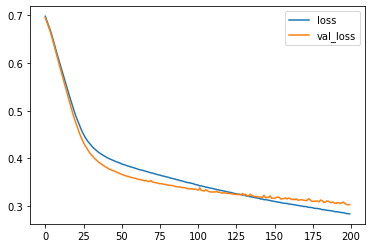

In [33]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [34]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
predictions = model.predict(X_test)
predictions = (predictions>0.5)
print(classification_report(y_test,predictions))
print('accuracy is :',accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       468
           1       0.84      0.92      0.88       485

    accuracy                           0.87       953
   macro avg       0.87      0.87      0.87       953
weighted avg       0.87      0.87      0.87       953

accuracy is : 0.869884575026233


In [35]:
model = Sequential()

model.add(Dense(30,input_shape=(28,),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam',
))

In [36]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          validation_data=(X_test, y_test)
                    )

Epoch 1/200
90/90 [==============================] - 1s 5ms/step - loss: 0.6904 - val_loss: 0.6822
Epoch 2/200
90/90 [==============================] - 0s 3ms/step - loss: 0.6774 - val_loss: 0.6599
Epoch 3/200
90/90 [==============================] - 0s 3ms/step - loss: 0.6554 - val_loss: 0.6114
Epoch 4/200
90/90 [==============================] - 0s 3ms/step - loss: 0.6199 - val_loss: 0.5472
Epoch 5/200
90/90 [==============================] - 0s 3ms/step - loss: 0.5774 - val_loss: 0.5020
Epoch 6/200
90/90 [==============================] - 0s 3ms/step - loss: 0.5517 - val_loss: 0.4811
Epoch 7/200
90/90 [==============================] - 0s 3ms/step - loss: 0.5480 - val_loss: 0.4593
Epoch 8/200
90/90 [==============================] - 0s 3ms/step - loss: 0.5207 - val_loss: 0.4395
Epoch 9/200
90/90 [==============================] - 0s 3ms/step - loss: 0.5224 - val_loss: 0.4283
Epoch 10/200
90/90 [==============================] - 0s 3ms/step - loss: 0.4909 - val_loss: 0.4114
Epoch 11/

<AxesSubplot:>

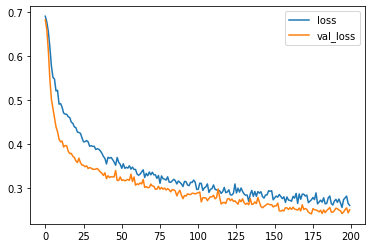

In [37]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [38]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
predictions = model.predict(X_test)
predictions = (predictions>0.5)
print(classification_report(y_test,predictions))
print('accuracy is :',accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89       468
           1       0.85      0.98      0.91       485

    accuracy                           0.90       953
   macro avg       0.91      0.90      0.90       953
weighted avg       0.91      0.90      0.90       953

accuracy is : 0.9034627492130115


In [39]:
model = Sequential()

model.add(Dense(30,input_shape=(28,),activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adamax(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    name='Adamax',
))

In [40]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          validation_data=(X_test, y_test)          )

Epoch 1/200
90/90 [==============================] - 2s 7ms/step - loss: 0.9358 - val_loss: 0.7229
Epoch 2/200
90/90 [==============================] - 0s 3ms/step - loss: 0.8841 - val_loss: 0.7123
Epoch 3/200
90/90 [==============================] - 0s 3ms/step - loss: 0.8474 - val_loss: 0.7001
Epoch 4/200
90/90 [==============================] - 0s 3ms/step - loss: 0.8085 - val_loss: 0.7083
Epoch 5/200
90/90 [==============================] - 0s 3ms/step - loss: 0.7704 - val_loss: 0.7213
Epoch 6/200
90/90 [==============================] - 0s 3ms/step - loss: 0.7432 - val_loss: 0.7281
Epoch 7/200
90/90 [==============================] - 0s 4ms/step - loss: 0.7424 - val_loss: 0.7277
Epoch 8/200
90/90 [==============================] - 0s 3ms/step - loss: 0.7190 - val_loss: 0.7198
Epoch 9/200
90/90 [==============================] - 0s 4ms/step - loss: 0.6905 - val_loss: 0.7061
Epoch 10/200
90/90 [==============================] - 0s 3ms/step - loss: 0.6777 - val_loss: 0.6917
Epoch 11/

<AxesSubplot:>

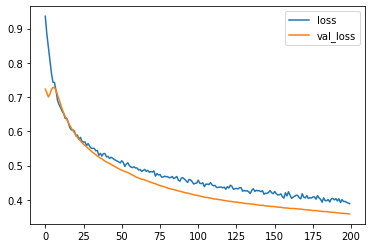

In [41]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [42]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
predictions = model.predict(X_test)
predictions = (predictions>0.5)
print(classification_report(y_test,predictions))
print('accuracy is :',accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       468
           1       0.83      0.88      0.85       485

    accuracy                           0.84       953
   macro avg       0.84      0.84      0.84       953
weighted avg       0.84      0.84      0.84       953

accuracy is : 0.8426023084994754


In [43]:
model = Sequential()

model.add(Dense(30,input_shape=(28,),activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='Adam')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [44]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          validation_data=(X_test, y_test),
          callbacks = [early_stop]
          )

Epoch 1/200
90/90 [==============================] - 2s 6ms/step - loss: 0.8684 - val_loss: 0.7352
Epoch 2/200
90/90 [==============================] - 0s 3ms/step - loss: 0.7436 - val_loss: 0.7225
Epoch 3/200
90/90 [==============================] - 0s 3ms/step - loss: 0.6827 - val_loss: 0.6866
Epoch 4/200
90/90 [==============================] - 0s 4ms/step - loss: 0.6564 - val_loss: 0.6386
Epoch 5/200
90/90 [==============================] - 0s 3ms/step - loss: 0.6372 - val_loss: 0.5949
Epoch 6/200
90/90 [==============================] - 0s 3ms/step - loss: 0.6150 - val_loss: 0.5551
Epoch 7/200
90/90 [==============================] - 0s 3ms/step - loss: 0.6124 - val_loss: 0.5397
Epoch 8/200
90/90 [==============================] - 0s 3ms/step - loss: 0.5992 - val_loss: 0.5378
Epoch 9/200
90/90 [==============================] - 0s 3ms/step - loss: 0.5833 - val_loss: 0.5337
Epoch 10/200
90/90 [==============================] - 0s 4ms/step - loss: 0.5796 - val_loss: 0.5284
Epoch 11/

<AxesSubplot:>

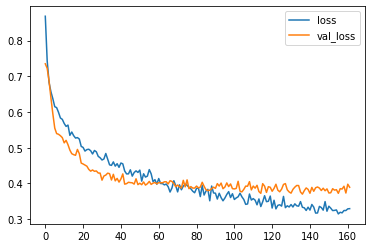

In [45]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [46]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
predictions = model.predict(X_test)
predictions = (predictions>0.5)
print(classification_report(y_test,predictions))
print('accuracy is :',accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       468
           1       0.90      0.89      0.89       485

    accuracy                           0.89       953
   macro avg       0.89      0.89      0.89       953
weighted avg       0.89      0.89      0.89       953

accuracy is : 0.8898216159496327
